# Discovery :
   * Chess: Our fascination -as copmuter students- with chess aligns seamlessly with our studies in computer field, as we are drawn to its parallels with algorithmic thinking, pattern recognition, and the strategic mindset that both disciplines demand and thus we chose chess dataset.

   
   * The choosen dataset -from Kaggle- contains just over 20,000 games collected from a selection of users on the site Lichess.org with several labels (start time, end time, number of turns etc..), and our objective is build a model that can predict the game final result (win, loss or draw) based on the various reccords in the dataset.

# Data Preparation

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data
df = pd.read_csv('games.csv')
display(df.head(4))

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3


In [37]:
## Listing fields/variables 

fields = [str(x) for x in df.columns]
dTypes = df.dtypes.tolist()
data = pd.DataFrame({'Field': fields, 'Data Type': dTypes}, columns=['Field', 'Data Type'])
display(data)

,Field,Data Type
0,rated,int32
1,turns,int64
2,winner,object
3,increment_code,int32
4,white_rating,int64
5,black_rating,int64
6,moves,object
7,victory_status_draw,int32
8,victory_status_mate,int32
9,victory_status_outoftime,int32


In [4]:
# We notice that white_id, black_id and the id columns give no information, so we drop them
df.drop(['id', 'white_id', 'black_id'], axis=1, inplace=True)

In [5]:
# Previewing dataset columns lenghts to see who should be splitted in multiple columns

for col in df.columns:
    print(f"{col} length: {len(df[col].unique())}")

rated length: 2
created_at length: 13151
last_move_at length: 13186
turns length: 211
victory_status length: 4
winner length: 3
increment_code length: 400
white_rating length: 1516
black_rating length: 1521
moves length: 18920
opening_eco length: 365
opening_name length: 1477
opening_ply length: 23


In [6]:
# perform label encoding on boolen column
df['rated'] = df['rated'].astype(int)

# Perform One Hot Encoding on categorical columns with less than 5 unique values
df = pd.get_dummies(df, columns=['victory_status'],drop_first=False)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rated                     20058 non-null  int32  
 1   created_at                20058 non-null  float64
 2   last_move_at              20058 non-null  float64
 3   turns                     20058 non-null  int64  
 4   winner                    20058 non-null  object 
 5   increment_code            20058 non-null  object 
 6   white_rating              20058 non-null  int64  
 7   black_rating              20058 non-null  int64  
 8   moves                     20058 non-null  object 
 9   opening_eco               20058 non-null  object 
 10  opening_name              20058 non-null  object 
 11  opening_ply               20058 non-null  int64  
 12  victory_status_draw       20058 non-null  bool   
 13  victory_status_mate       20058 non-null  bool   
 14  victor

In [7]:

# Convert new colmuns  from uint8 to int
columns = ['victory_status_draw', 'victory_status_mate',
       'victory_status_outoftime', 'victory_status_resign']

df.loc[:, columns] = df.loc[:, columns].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rated                     20058 non-null  int32  
 1   created_at                20058 non-null  float64
 2   last_move_at              20058 non-null  float64
 3   turns                     20058 non-null  int64  
 4   winner                    20058 non-null  object 
 5   increment_code            20058 non-null  object 
 6   white_rating              20058 non-null  int64  
 7   black_rating              20058 non-null  int64  
 8   moves                     20058 non-null  object 
 9   opening_eco               20058 non-null  object 
 10  opening_name              20058 non-null  object 
 11  opening_ply               20058 non-null  int64  
 12  victory_status_draw       20058 non-null  int32  
 13  victory_status_mate       20058 non-null  int32  
 14  victor

In [8]:
# Previewing the moves stats to get a sense of the data
import math
df['moves'].apply(lambda x: math.ceil(len(x.split(' '))/2)).describe()

count    20058.000000
mean        30.490278
std         16.782955
min          1.000000
25%         19.000000
50%         28.000000
75%         40.000000
max        175.000000
Name: moves, dtype: float64

In [9]:
# Now we are going to add a new column with the number of moves in each game
df['moves_num'] = df['moves'].apply(lambda x: math.ceil(len(x.split(' '))/2))


In [10]:
# The max number of moves in proffinal chess is less than 150, so we drop all outliers games
Q1 = df['moves_num'].quantile(q=0.25) 
Q3 = df['moves_num'].quantile(q=0.75)

IQR = Q3 - Q1

df.drop(df[df['moves_num'] >= Q3 + 1.5*IQR].index, inplace=True)

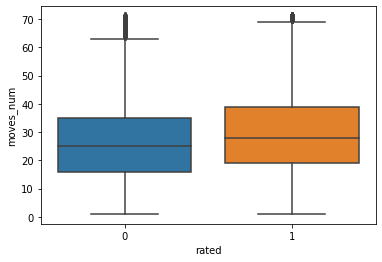

In [11]:
# Ploting box plot after deleting outliers
plt.figure()
sns.boxplot(y='moves_num',x='rated',data=df);
plt.show()

In [12]:
# We notice that still  there are some noisy in the data especially the lower wisker of the boxplot (there are many games with 1 moves)
# In chess the minimum number of moves to win a game is 2 moves (Fool's mate) so we will remove all the games with less than 2 moves

OneMove_games = df.drop(df[df['moves_num'] < 8].index, inplace=True)

In [13]:
df['moves_num'].describe()

count    18593.000000
mean        30.795084
std         14.228139
min          8.000000
25%         20.000000
50%         28.000000
75%         39.000000
max         71.000000
Name: moves_num, dtype: float64

In [14]:
# We are going to create a new column called period which is the difference between the last move and the creation of the account
df['period'] = df['last_move_at'] - df['created_at']
df['period'].describe() 

count    1.859300e+04
mean     8.812592e+05
std      4.903121e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.863800e+05
75%      8.052810e+05
max      6.058447e+08
Name: period, dtype: float64

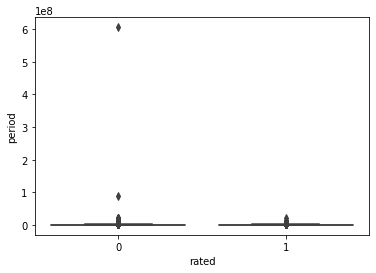

In [15]:
# Ploting box plot for period
plt.figure()
sns.boxplot(y = 'period', x = 'rated', data = df)
plt.show()

In [16]:
# Drop the 'created_at' and 'last_move_at' columns because they are not useful for our analysis and they are given in the wrong format.
times_columns = df.drop(['created_at', 'last_move_at', 'period'], axis=1, inplace=True)

In [17]:
# The increment_code columns represents ..., so we convert it to a better format by taking the number before the + sign
df['increment_code'] = df['increment_code'].str.split('+').str[0].astype(int)
# not a good idea to do this, because it will make the data skewed
#df['increment_code'] = df['increment_code'].apply(lambda x: 1 if x > 0 else 0)
#df['increment_code'] 

In [18]:
df["increment_code"].value_counts()

increment_code
10     8854
15     3144
5      1641
20      870
8       863
30      699
7       617
25      294
9       237
12      216
6       155
45      149
180     108
11       89
60       86
13       65
14       64
4        59
3        53
2        51
16       43
17       37
40       30
1        30
0        29
90       24
18       23
35       23
19       21
120       9
150       7
29        2
21        1
Name: count, dtype: int64

In [19]:
def create_2elementsList(array):
    # initialize an empty list for the new array
    new = []
    # loop through the original array with a step of 2
    for i in range(0, len(array), 2):
        # append the two elements as a sub-list to the new array
        new.append(array[i:i+2])
    return new

In [20]:
# Converting the elements of moves column form a sting if moves to a list
df['moves'] = df['moves'].apply(lambda x: create_2elementsList(x.split()))

In [21]:
# Creating an Opening Column where we store the moves taken at the begining if the game using the opening_ply column
df['opening_num'] = df.apply(lambda row: len(row["moves"][:int(row["opening_ply"])]), axis=1)
df.loc[4, 'opening_num']


5

In [22]:
# Creating a last_moves column where we store the last two moves of each game
df['last_moves_num'] = df['moves'].apply(lambda x: len(x[-2]))
df.loc[4, 'last_moves_num']

2

In [23]:
# Creating a column for the number of mid-game moves between the opening and last moves
df['midMoves_num'] = df['moves_num'] - 2- df['opening_ply']
df['midMoves_num']

1         2
2        26
3        26
4        41
6         5
         ..
20053     8
20054    37
20055    13
20056    49
20057    34
Name: midMoves_num, Length: 18593, dtype: int64

In [24]:
# Preprocessing the opening_name column
df['opening_name'] = df['opening_name'].apply(lambda x: x.split(':')[0].split('|')[0].split('#')[0])

In [25]:
(df['opening_name'].unique())

array(['Nimzowitsch Defense', "King's Pawn Game", "Queen's Pawn Game",
       'Philidor Defense', 'Blackmar-Diemer Gambit', 'Italian Game',
       'Scandinavian Defense', "Van't Kruijs Opening", 'French Defense',
       'French Defense ', 'Four Knights Game', 'Philidor Defense ',
       'Sicilian Defense', 'English Opening', 'Scotch Game',
       'Slav Defense', "Queen's Gambit Refused",
       "Queen's Gambit Accepted", 'Robatsch (Modern) Defense',
       'Indian Game', 'Dutch Defense', 'Vienna Game', 'Modern Defense',
       'Horwitz Defense', 'Blumenfeld Countergambit ',
       'Zukertort Opening', "Queen's Pawn", 'Crab Opening',
       "Queen's Indian Defense", 'Gruenfeld Defense',
       "Queen's Gambit Declined", 'Yusupov-Rubinstein System',
       'Ruy Lopez', "Bishop's Opening", 'Benoni Defense',
       "King's Indian Attack", 'Alekhine Defense ', 'Alekhine Defense',
       'Caro-Kann Defense', 'Goldsmith Defense', 'Nimzo-Indian Defense',
       'Bogo-Indian Defense', 'Amar Ope

In [26]:
# We going to  deop the opening name  columns because generate a lot of dimnesionality due to high number of unique values
df.drop(['opening_name'], axis=1, inplace=True)

In [27]:
# Now we are going to drop the opening_ply column because it become useless for our analysis
df.drop(['opening_ply'], axis=1, inplace=True)

In [28]:
# We going to drop the opening_eco column because it is not useful for our analysis
df.drop(['opening_eco'], axis=1, inplace=True)

In [29]:
display(df.sample(5))
display(df.info())

,rated,turns,winner,increment_code,white_rating,black_rating,moves,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,moves_num,opening_num,last_moves_num,midMoves_num
8404,1,94,black,8,1759,1500,"[[e4, c5], [Nf3, d6], [d4, cxd4], [Nxd4, Nf6],...",0,1,0,0,47,10,2,35
15869,0,25,white,20,1527,1496,"[[e4, c6], [d4, d5], [e5, Bf5], [c3, e6], [g4,...",0,0,0,1,13,5,2,6
15984,0,17,black,25,1610,1778,"[[c4, c5], [Nc3, g6], [g3, Bg7], [Qb3, e6], [B...",0,0,0,1,9,3,2,4
9162,1,31,white,8,1081,1213,"[[e4, c5], [Nf3, f6], [Bd3, d5], [Nc3, c4], [B...",0,1,0,0,16,3,2,11
17657,0,138,black,15,1500,1592,"[[e4, d6], [Nf3, Nf6], [Bd3, g6], [h3, Bg7], [...",0,1,0,0,69,2,2,65


<class 'pandas.core.frame.DataFrame'>
Index: 18593 entries, 1 to 20057
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   rated                     18593 non-null  int32 
 1   turns                     18593 non-null  int64 
 2   winner                    18593 non-null  object
 3   increment_code            18593 non-null  int32 
 4   white_rating              18593 non-null  int64 
 5   black_rating              18593 non-null  int64 
 6   moves                     18593 non-null  object
 7   victory_status_draw       18593 non-null  int32 
 8   victory_status_mate       18593 non-null  int32 
 9   victory_status_outoftime  18593 non-null  int32 
 10  victory_status_resign     18593 non-null  int32 
 11  moves_num                 18593 non-null  int64 
 12  opening_num               18593 non-null  int64 
 13  last_moves_num            18593 non-null  int64 
 14  midMoves_num              1

None

# Model Planning 

The pair plot shows scatter plots for pairs of numerical variables. There appears to be a positive correlation between 'white_rating' and 'black_rating', suggesting that higher-rated players tend to face opponents with similar ratings. Additionally, 'moves_num' seems to have a positive relationship with both 'white_rating' and 'black_rating', suggesting that longer games involve players with higher ratings.

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


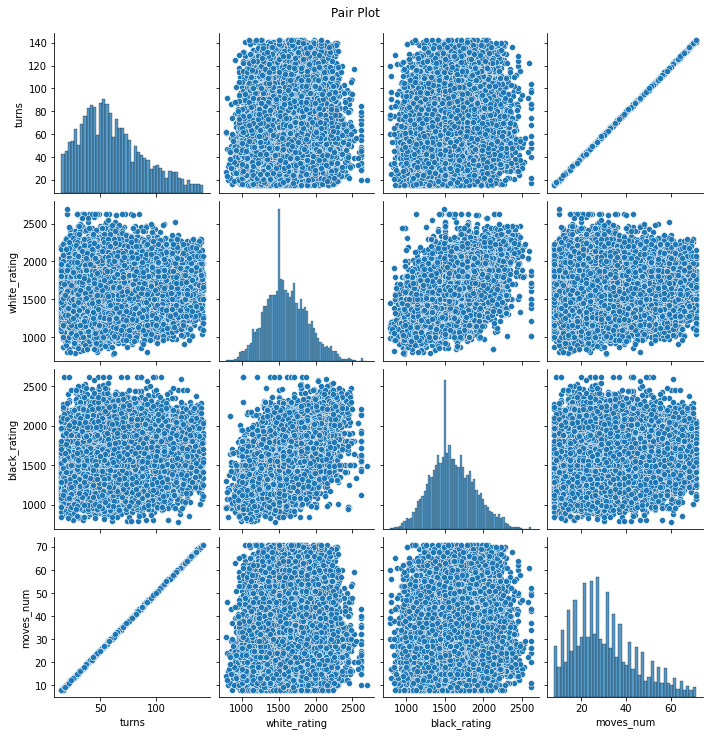

In [30]:
# Pair Plot
sns.pairplot(df[['turns', 'white_rating', 'black_rating', 'moves_num']])
plt.suptitle('Pair Plot', y=1.02)
plt.show()


The box plot of ratings illustrates the distribution of player ratings. It shows that the median rating for both white and black players is around 1900-2000, with some outliers present in both categories.

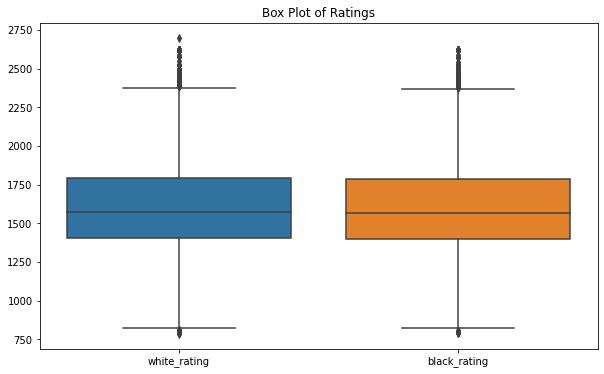

In [31]:
# Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['white_rating', 'black_rating']])
plt.title('Box Plot of Ratings')
plt.show()


The scatter plot of player ratings reveals how ratings of white and black players are distributed across winners and losers. It suggests that higher-rated white players tend to win more often, while higher-rated black players also have a good chance of winning.

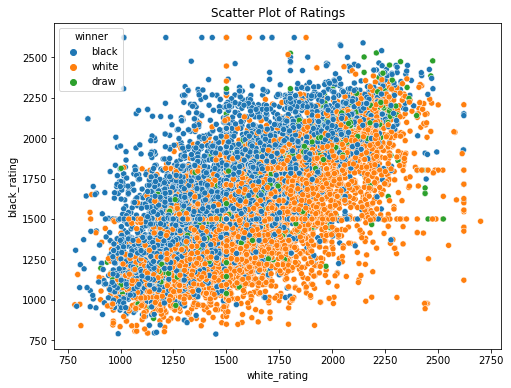

In [32]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='white_rating', y='black_rating', hue='winner')
plt.title('Scatter Plot of Ratings')
plt.show()


Regression Plot of Moves vs. White Rating:

The regression plot demonstrates the relationship between 'moves_num' and 'white_rating'. It suggests a slight positive correlation, implying that games with more moves often involve players with higher white ratings.

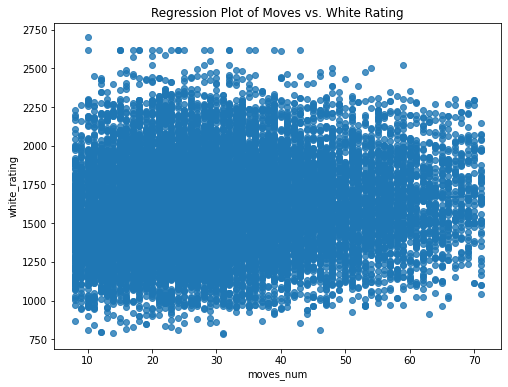

In [33]:

# Regression Plot
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='moves_num', y='white_rating')
plt.title('Regression Plot of Moves vs. White Rating')
plt.show()


The histogram of 'opening_num' indicates the frequency distribution of different opening numbers. It shows that the majority of games have opening numbers around 5 to 10, with a decline in frequency as the opening number deviates from this range.

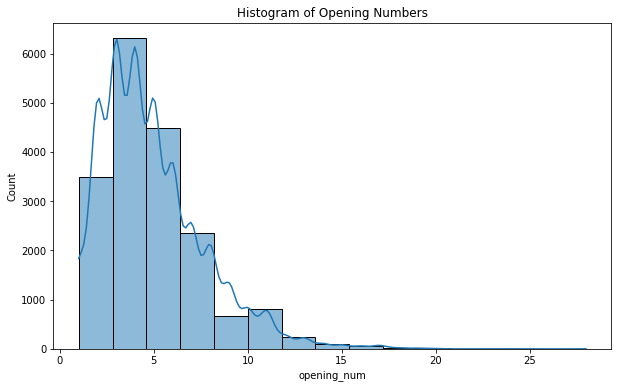

In [34]:

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='opening_num', bins=15, kde=True)
plt.title('Histogram of Opening Numbers')
plt.show()


The Countplot for winner counts demonstrates that the white wins more games than black 

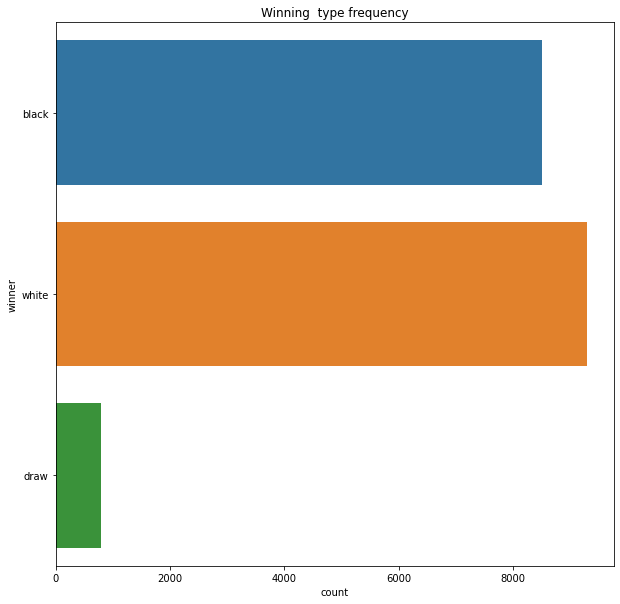

In [35]:

plt.figure(figsize=(10,10))
ax = sns.countplot(y="winner",data=df)
plt.title('Winning  type frequency')
plt.show()


ViolinPlot for winner VS. turns

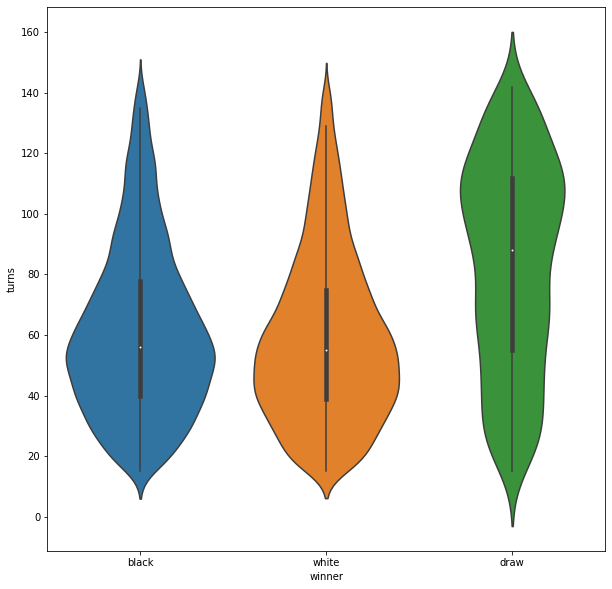

In [36]:

plt.figure(figsize=(10,10))
ax = sns.violinplot(x='winner',y='turns',data=df)
plt.show()

# Relationships Assessment

* Based on the knowledge we gained from the analysis above, we can reach several conclusions regarding relationships between the featrues in our dataset: 

    * It's possible that longer games ('turns') might indicate a more strategic and thoughtful approach, potentially            
    influencing the outcome.

    * Higher player ratings could suggest a stronger player, leading to a higher chance of winning.
    Certain 'victory_status' categories might correlate with different playing styles, affecting the outcome.

    * Victory status could reflect different playing styles; aggressive players might aim for 'mate' while defensive players might settle for a 'draw'.

    * Specific openings might catch opponents off guard, providing an advantage.

    * factors like 'turns', player ratings, victory status, and opening moves could potentially have an impact on the chance to win in a chess game. However, further statistical analysis or machine learning modeling would be needed to establish more       robust relationships.

    * The reccords indicate that the white player wins slightly more than the black, even though there is no consistent factor or cause for this conclusion.
